# Apresentação dos Dados

Este com conjunto de dados foi coletado do Portal da Transparência do Distrito Federal, o qual pode ser obtido no link a seguir <a href = 'http://www.transparencia.df.gov.br/#/servidores/orgao'>Portal da Transparência</a>.
<br>
Com dados dispostos neste dataset realizarei insights acerca do quadro de professores da rede pública que estão ativos. 

In [1]:
# Celula para importação de bibliotecas
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colorsys
import seaborn as sns
plt.style.use ('seaborn-talk') # O estilo adiciona cores e padrões diferentes para diferenciar os grâficos.

In [2]:
# Lendo arquivo csv
professor = pd.read_csv ('Professores.csv', encoding='UTF-8', delimiter = ';')
# encoding é a codificação para ler/escrever no padrão UTF (UTF-8)

In [3]:
# Criando DataFrame
df_professor = pd.DataFrame (professor)

In [4]:
# Mostrando as cinco primeiras linhas do DataFrame
df_professor.head()

,Nome,Orgao,Cargo,Funcao,Situacao,Carreira,Lotacao,Data de Admissao,Matricula,Status,Regime,Situacao Funcional
0,ADRIANA ARAUJO DE SANTANA MARQUES DA SILVA,SECRETARIA DE ESTADO DE EDUCACAO,PROFESSOR DE EDUC. BASICA,PROFESSOR,ATIVO,MAGISTERIO PUBLICO DO DF,CENTRO INTERESCOLAR DE LINGUAS 02 DE BRASILIA,24/03/2003,20030324,NORMAL,ESTATUTARIO,MAGISTERIO (PROFESSOR)
1,ALCIDEA VIEIRA COELHO,SECRETARIA DE ESTADO DE EDUCACAO,PROFESSOR DE EDUC. BASICA,PROFESSOR,ATIVO,MAGISTERIO PUBLICO DO DF,CONVENIO IHGDF,13/01/1993,19930113,NORMAL,ESTATUTARIO,MAGISTERIO (PROFESSOR)
2,ANDRESSA CARNEIRO LOPES,SECRETARIA DE ESTADO DE EDUCACAO,PROFESSOR DE EDUC. BASICA,PROFESSOR,ATIVO,MAGISTERIO PUBLICO DO DF,ESCOLA CLASSE 416 SUL,08/10/1996,19961008,NORMAL,ESTATUTARIO,MAGISTERIO (PROFESSOR)
3,CELIA MEDEIROS SCHNEIDER,SECRETARIA DE ESTADO DE EDUCACAO,PROFESSOR DE EDUC. BASICA,PROFESSOR,ATIVO,MAGISTERIO PUBLICO DO DF,ESCOLA CLASSE 01 DO RIACHO FUNDO,14/04/1992,19920414,NORMAL,ESTATUTARIO,MAGISTERIO (PROFESSOR)
4,CIBELY FARIA,SECRETARIA DE ESTADO DE EDUCACAO,PROFESSOR DE EDUC. BASICA,PROFESSOR,ATIVO,MAGISTERIO PUBLICO DO DF,ESCOLA CLASSE 62 DE CEILANDIA,06/02/2007,20070206,NORMAL,ESTATUTARIO,MAGISTERIO (PROFESSOR)


In [5]:
# Mostrando quantas linhas e colunas o DataFrame possui
print (df_professor.shape)

(47178, 12)


In [6]:
# Verifica se as colunas posssuem valores nulos.
df_professor.isnull().sum()

Nome                    0
Orgao                   0
Cargo                 240
Funcao                  0
Situacao                0
Carreira                0
Lotacao                 0
Data de Admissao        0
Matricula               0
Status                  0
Regime                  0
Situacao Funcional      0
dtype: int64

In [7]:
# Verificando se existe valores nulos em uma determinada coluna e retorna as cinco primeiras linhas
df_professor['Cargo'].isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: Cargo, dtype: bool

In [8]:
# Criei uma nova variavel para armazenar meu dataframe para não perder informação caso queira trabalhar com outros
# Dados. Mas é não obrigatório realizar tal operação
new_df_professor = df_professor

In [9]:
# Limpando dados diretemante no dataframe
new_df_professor.drop (['Carreira', 'Data de Admissao', 'Matricula', 'Regime', 'Situacao Funcional'], axis = 1, inplace = True)

In [10]:
# Mostrando quantas colunas o novo dataframe possui 
new_df_professor.shape

(47178, 7)

In [11]:
# Mostrando as cinco últimas linhas  do dataframe e como o mesmo ficou depois que foi realizada a limpeza de alguns 
# dados que neste primeiro momento não será tão relevante.
new_df_professor.tail()

,Nome,Orgao,Cargo,Funcao,Situacao,Lotacao,Status
47173,ZULMIRA BISPO SOARES,SECRETARIA DE ESTADO DE EDUCACAO,AGENTE G.E.- SERV GERAIS,PROFESSOR,ATIVO,CENTRO EDUCACIONAL 03 DO GUARA,NORMAL
47174,ZULMIRA CAETANO SILVA,SECRETARIA DE ESTADO DE EDUCACAO,PROFESSOR DE EDUC. BASICA,PROFESSOR,ATIVO,ESCOLA CLASSE 114 SUL,NORMAL
47175,ZULMIRA OLIVEIRA BROTAS,SECRETARIA DE ESTADO DE EDUCACAO,TECNICO G.E.- EDUC EM SAUDE,PROFESSOR,ATIVO,UNIDADE REGIONAL DE INFRAESTRUTURA E APOIO EDU...,NORMAL
47176,ZULMIRA SANTOS DA SILVA,SECRETARIA DE ESTADO DE EDUCACAO,PROFESSOR DE EDUC. BASICA,PROFESSOR,ATIVO,ESCOLA CLASSE 06 DE BRAZLANDIA,NORMAL
47177,ZURADIA DA SILVA ANSELMO,SECRETARIA DE ESTADO DE EDUCACAO - TEMPORARIO,CONTRATO TEMPORARIO,PROFESSOR,ATIVO,CENTRO DE EDUCACAO INFANTIL DA CANDANGOLANDIA,NORMAL


In [12]:
# O comando replace foi realizado devido ao dataframe possuir alguns espaços em brancos, prejudicando a 
# continuidade do projeto.
#new_df_professor['Funcao'] = new_df_professor['Funcao'].replace(" ", "") # Outra maneira de replace
new_df_professor['Funcao'] = new_df_professor['Funcao'].str.replace(" ", "")

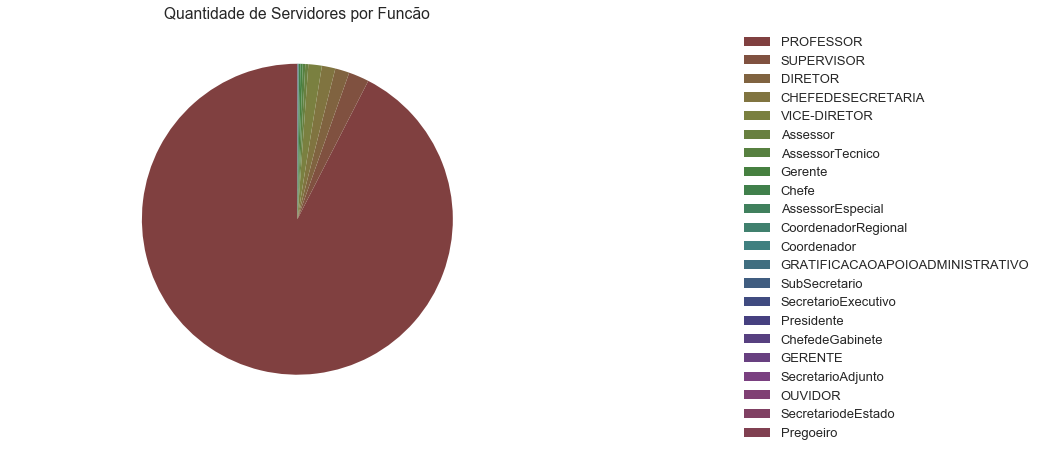

In [13]:
# Percorre toda a coluna contando a quantidade de cada elemento e retornando o indice no final
num  = len(new_df_professor.Funcao.value_counts().index)

# Gera as cores do gráfico
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range (num)]
listaRGB = list (map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))
labels = new_df_professor.Funcao.value_counts().index

# Configura o gráfico e após o mesmo é gerando
fatias, texto = plt.pie(new_df_professor.Funcao.value_counts(), colors = listaRGB, startangle = 90)
plt.axes().set_aspect ('equal', 'datalim')
plt.legend (fatias, labels, bbox_to_anchor = (1.25, 1))
plt.title ('Quantidade de Servidores por Funcão')
plt.show()

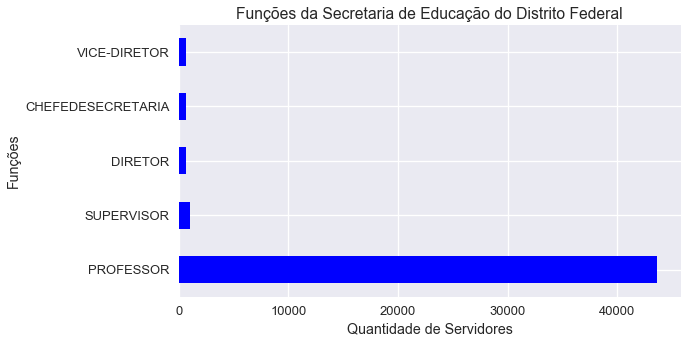

In [14]:
# Contagem rápida de servidores por função e plotando o resultado da contagem em forma de gráfico
conta_funcao = new_df_professor['Funcao'].value_counts().head(5)
conta_funcao.plot (kind = 'barh', figsize = (9, 5), color = "Blue")

# Configurando os títulos do gráfico
plt.title ('Funções da Secretaria de Educação do Distrito Federal')
plt.xlabel ('Quantidade de Servidores')
plt.ylabel ('Funções')
plt.show()


In [15]:
# Retorna a quantidade de servidor por função.
#new_df_professor['Funcao'].value_counts() 

In [16]:
# Realiza busca na coluna da palavra "X" retornado quantas vezes a mesma palavra se repete
 
#ct = 0
#for busca in new_df_professor['Funcao']:
#    if busca in 'DIRETOR':
#        ct += 1

#print ('Total de Diretor: ', ct)

In [17]:
# Uma forma mais simples de fazer o metodo anterior
# Realiza busca na coluna da palavra "X" retornado quantas vezes a mesma palavra se repete
quantidade_diretor = new_df_professor['Funcao'][new_df_professor['Funcao'] == 'DIRETOR'].value_counts()
quantidade_vice_diretor = new_df_professor['Funcao'][new_df_professor['Funcao'] == 'VICE-DIRETOR'].value_counts()

print ('Quantidade de diretor: %d \nQuantidade de vice-diretor: %d' % (quantidade_diretor, quantidade_vice_diretor))

Quantidade de diretor: 699 
Quantidade de vice-diretor: 659


In [18]:
new_df_professor.head()

,Nome,Orgao,Cargo,Funcao,Situacao,Lotacao,Status
0,ADRIANA ARAUJO DE SANTANA MARQUES DA SILVA,SECRETARIA DE ESTADO DE EDUCACAO,PROFESSOR DE EDUC. BASICA,PROFESSOR,ATIVO,CENTRO INTERESCOLAR DE LINGUAS 02 DE BRASILIA,NORMAL
1,ALCIDEA VIEIRA COELHO,SECRETARIA DE ESTADO DE EDUCACAO,PROFESSOR DE EDUC. BASICA,PROFESSOR,ATIVO,CONVENIO IHGDF,NORMAL
2,ANDRESSA CARNEIRO LOPES,SECRETARIA DE ESTADO DE EDUCACAO,PROFESSOR DE EDUC. BASICA,PROFESSOR,ATIVO,ESCOLA CLASSE 416 SUL,NORMAL
3,CELIA MEDEIROS SCHNEIDER,SECRETARIA DE ESTADO DE EDUCACAO,PROFESSOR DE EDUC. BASICA,PROFESSOR,ATIVO,ESCOLA CLASSE 01 DO RIACHO FUNDO,NORMAL
4,CIBELY FARIA,SECRETARIA DE ESTADO DE EDUCACAO,PROFESSOR DE EDUC. BASICA,PROFESSOR,ATIVO,ESCOLA CLASSE 62 DE CEILANDIA,NORMAL


In [19]:
new_df_professor['Status'].value_counts()

NORMAL              44367
AFASTADO             2080
CEDIDO                373
REQUISITADO           146
INCLUIDO NO MES       114
DESLIGADO NO MES       50
DESLIGADO              47
POSSE                   1
Name: Status, dtype: int64

In [20]:
new_df_professor['Status'] = new_df_professor['Status'].str.replace(" ", "")
new_df_professor['Situacao'] = new_df_professor['Situacao'].str.replace(" ", "")

In [21]:
def cor_status (x):
    
    if x == 'NORMAL':
        return 0
    
    elif x == 'AFASTADO':
        return 1
    
    elif x == 'CEDIDO':
        return 2
    
    elif x == 'REQUISITADO':
        return 3
    
    elif x == 'INCLUIDO NO MES':
        return 4
    
    elif x == 'DESLIGADO NO MES':
        return 5
    
    elif x == 'DESLIGADO':
        return 6
    
    else:
        return 7

In [27]:
def situa (y):
    
    if y == 'ATIVO':
        return 1

In [28]:
new_df_professor['Situacao Num'] = new_df_professor['Situacao'].apply(situa)

In [26]:
new_df_professor['Situacao'].value_counts()

ATIVO    47178
Name: Situacao, dtype: int64

In [22]:
new_df_professor['Number Cor'] = new_df_professor['Status'].apply(cor_status)

In [29]:
new_df_professor.head()

,Nome,Orgao,Cargo,Funcao,Situacao,Lotacao,Status,Number Cor,Situacao Num
0,ADRIANA ARAUJO DE SANTANA MARQUES DA SILVA,SECRETARIA DE ESTADO DE EDUCACAO,PROFESSOR DE EDUC. BASICA,PROFESSOR,ATIVO,CENTRO INTERESCOLAR DE LINGUAS 02 DE BRASILIA,NORMAL,0,1
1,ALCIDEA VIEIRA COELHO,SECRETARIA DE ESTADO DE EDUCACAO,PROFESSOR DE EDUC. BASICA,PROFESSOR,ATIVO,CONVENIO IHGDF,NORMAL,0,1
2,ANDRESSA CARNEIRO LOPES,SECRETARIA DE ESTADO DE EDUCACAO,PROFESSOR DE EDUC. BASICA,PROFESSOR,ATIVO,ESCOLA CLASSE 416 SUL,NORMAL,0,1
3,CELIA MEDEIROS SCHNEIDER,SECRETARIA DE ESTADO DE EDUCACAO,PROFESSOR DE EDUC. BASICA,PROFESSOR,ATIVO,ESCOLA CLASSE 01 DO RIACHO FUNDO,NORMAL,0,1
4,CIBELY FARIA,SECRETARIA DE ESTADO DE EDUCACAO,PROFESSOR DE EDUC. BASICA,PROFESSOR,ATIVO,ESCOLA CLASSE 62 DE CEILANDIA,NORMAL,0,1


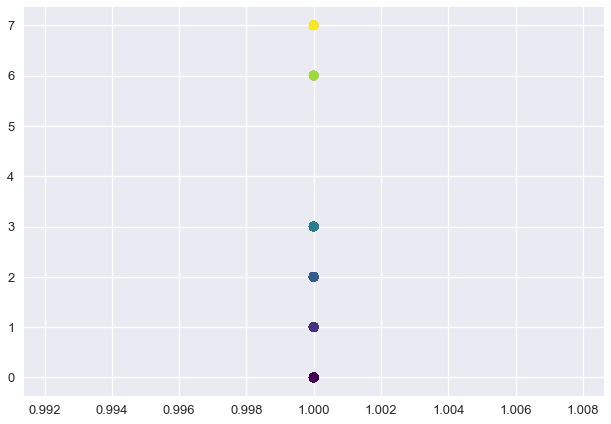

In [36]:
plt.scatter (
        new_df_professor['Situacao Num'], new_df_professor['Number Cor'],
        c = new_df_professor['Number Cor'], cmap = 'viridis', alpha = 0.4    
)

plt.show()